In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [120]:
train = pd.read_csv(r"D:\Aditya\data\house-prices-advanced-regression-techniques\train.csv")
test = pd.read_csv(r"D:\Aditya\data\house-prices-advanced-regression-techniques\test.csv")
train.shape

(1460, 81)

In [121]:
corr = train.corr()
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [122]:
trainID = train['Id']
testID = test['Id']

train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [124]:
cat, num = [], []

for i in train.columns:
    c = train.dtypes[i]
    if c == 'object':
        cat.append(i)
    else:
        num.append(i)

print('Cat Columns: {}\n'.format(len(cat)), cat)
print('\nNum Columns: {}\n'.format(len(num)), num)

Cat Columns: 43
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Num Columns: 37
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', '

In [125]:
cat_test, num_test = [], []

for i in test.columns:
    c = test.dtypes[i]
    if c == 'object':
        cat_test.append(i)
    else:
        num_test.append(i)

print('Cat_test Columns: {}\n'.format(len(cat_test)), cat_test)
print('\nNum_test Columns: {}\n'.format(len(num_test)), num_test)

Cat_test Columns: 43
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Num_test Columns: 36
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Gara

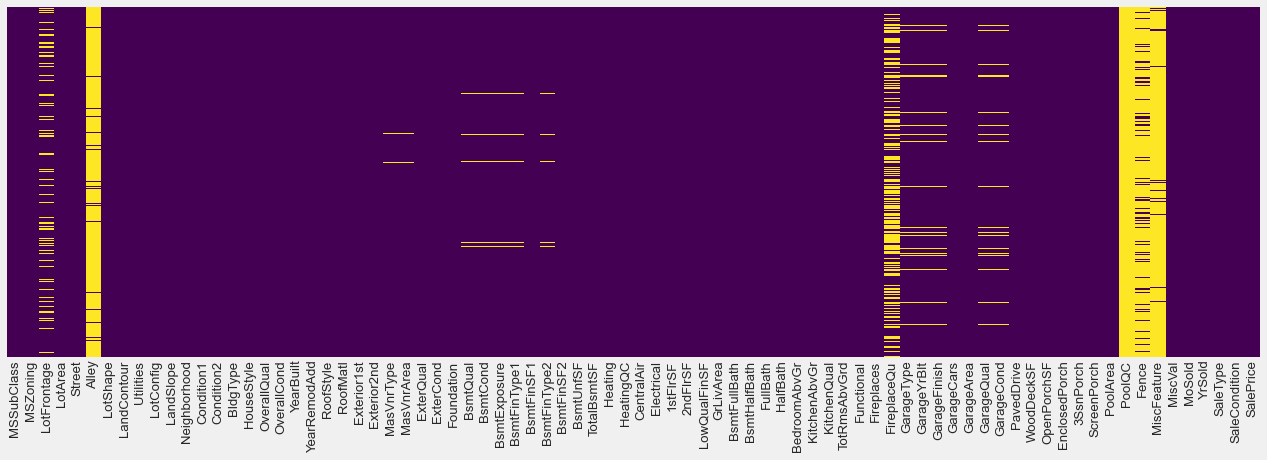

In [126]:
plt.figure(figsize=(20,6))
sns.heatmap(train.isnull(), yticklabels = False, cbar=False, cmap='viridis')
plt.show()

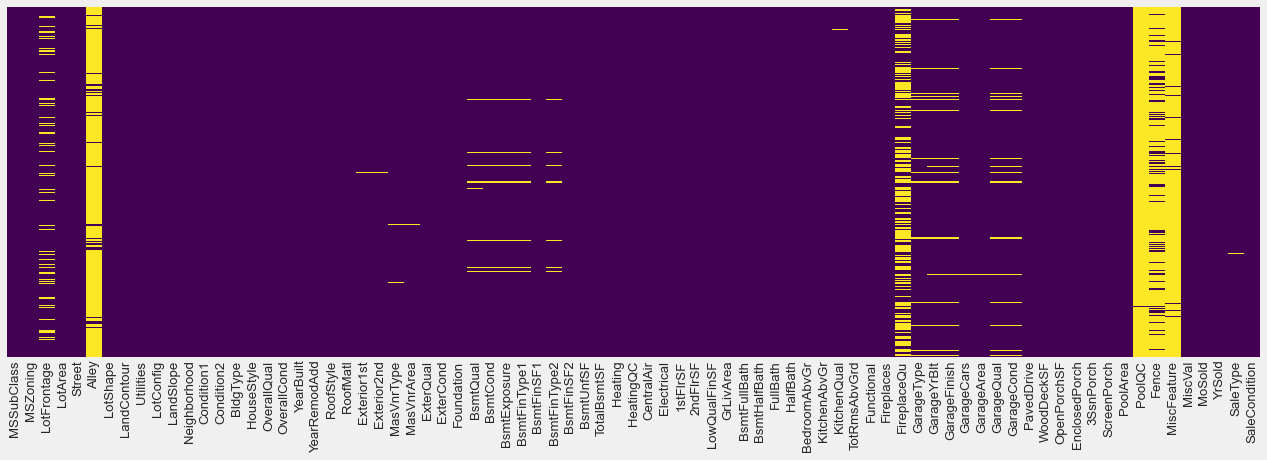

In [127]:
plt.figure(figsize=(20,6))
sns.heatmap(test.isnull(), yticklabels = False, cbar=False, cmap='viridis')
plt.show()

In [128]:
var = [feature for feature in cat if train[feature].isnull().sum()]
for feature in var:
    print('{}: {}%'.format(feature, np.round(train[feature].isnull().mean(), 3)))

Alley: 0.938%
MasVnrType: 0.005%
BsmtQual: 0.025%
BsmtCond: 0.025%
BsmtExposure: 0.026%
BsmtFinType1: 0.025%
BsmtFinType2: 0.026%
Electrical: 0.001%
FireplaceQu: 0.473%
GarageType: 0.055%
GarageFinish: 0.055%
GarageQual: 0.055%
GarageCond: 0.055%
PoolQC: 0.995%
Fence: 0.808%
MiscFeature: 0.963%


In [129]:
var_test = [feature for feature in cat_test if test[feature].isnull().sum()]
for feature in var_test:
    print('{}: {}%'.format(feature, np.round(train[feature].isnull().mean(), 3)))

MSZoning: 0.0%
Alley: 0.938%
Utilities: 0.0%
Exterior1st: 0.0%
Exterior2nd: 0.0%
MasVnrType: 0.005%
BsmtQual: 0.025%
BsmtCond: 0.025%
BsmtExposure: 0.026%
BsmtFinType1: 0.025%
BsmtFinType2: 0.026%
KitchenQual: 0.0%
Functional: 0.0%
FireplaceQu: 0.473%
GarageType: 0.055%
GarageFinish: 0.055%
GarageQual: 0.055%
GarageCond: 0.055%
PoolQC: 0.995%
Fence: 0.808%
MiscFeature: 0.963%
SaleType: 0.0%


In [130]:
train.fillna({'Alley': 'None', 'Fence':'None', 'MiscFeature':'None', 
           'PoolQC':'None', 'FireplaceQu':'None', 'MasVnrType':'None',
            'BsmtQual':'None', 'BsmtCond':'None',
           'BsmtExposure':'None', 'BsmtFinType1':'None',
           'BsmtFinType2':'None',
            'GarageType':'None','GarageCond': 'None', 'GarageQual':'None', 
           'GarageQual':'None', 'GarageFinish': 'None'}, inplace=True)

train['MSZoning']=train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])
train['Functional']=train['Functional'].fillna(train['Functional'].mode()[0])
train['KitchenQual']=train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['SaleType']=train['SaleType'].fillna(train['SaleType'].mode()[0])
train['Utilities']=train['Utilities'].fillna(train['Utilities'].mode()[0])
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
train['Exterior1st'].fillna('Other' ,inplace=True)
train['Exterior2nd'].fillna('Other' ,inplace=True)

In [131]:
test.fillna({'Alley': 'None', 'Fence':'None', 'MiscFeature':'None','PoolQC':'None', 'FireplaceQu':'None', 'MasVnrType':'None'}, inplace = True)
test.fillna({'BsmtQual':'None', 'BsmtCond':'None','BsmtExposure':'None', 'BsmtFinType1':'None','BsmtFinType2':'None'},inplace=True)
test.fillna({'GarageType':'None','GarageCond': 'None', 'GarageQual':'None', 'GarageQual':'None', 'GarageFinish': 'None'}, inplace=True)

test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Electrical']=test['Electrical'].fillna(test['Electrical'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())
test['Exterior1st'].fillna('Other' ,inplace=True)
test['Exterior2nd'].fillna('Other' ,inplace=True)

In [132]:
variable = [feature for feature in num if train[feature].isnull().sum()]
for feature in variable:
    print("{}: {}%".format(feature,np.round(train[feature].isnull().mean(),3)))

MasVnrArea: 0.005%


In [133]:
variable = [feature for feature in num_test if test[feature].isnull().sum()]
for feature in variable:
    print("{}: {}%".format(feature,np.round(test[feature].isnull().mean(),3)))

MasVnrArea: 0.01%
BsmtFinSF1: 0.001%
BsmtFinSF2: 0.001%
BsmtUnfSF: 0.001%
TotalBsmtSF: 0.001%
BsmtFullBath: 0.001%
BsmtHalfBath: 0.001%
GarageCars: 0.001%
GarageArea: 0.001%


In [134]:
train.fillna({'GarageCars':0, 'GarageArea': 0}, inplace = True)

In [135]:
#Imputing Missing Numerical Basement Columns

Bsmt_con = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath']
for Bsmt in Bsmt_con:
    train[Bsmt].fillna(0, inplace=True) 

train.fillna({'GarageCars':0, 'GarageArea': 0}, inplace = True)

####

Bsmt_con = ['MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath']
for Bsmt in Bsmt_con:
    test[Bsmt].fillna(0, inplace=True) 
    
#Imputing Missing Numerical Garage Columns in Test Dataset

test.fillna({'GarageCars':0, 'GarageArea': 0}, inplace = True)

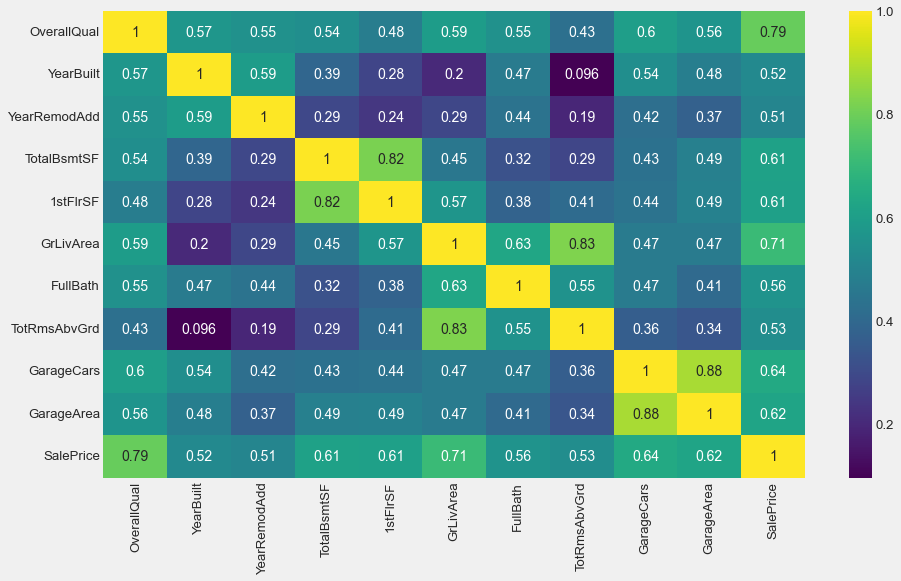

In [136]:
top_corr_features = corr.index[abs(corr['SalePrice'] > 0.5)]
plt.figure(figsize=(14, 8))
g = sns.heatmap(train[top_corr_features].corr(), annot=True, cmap='viridis')
plt.show()

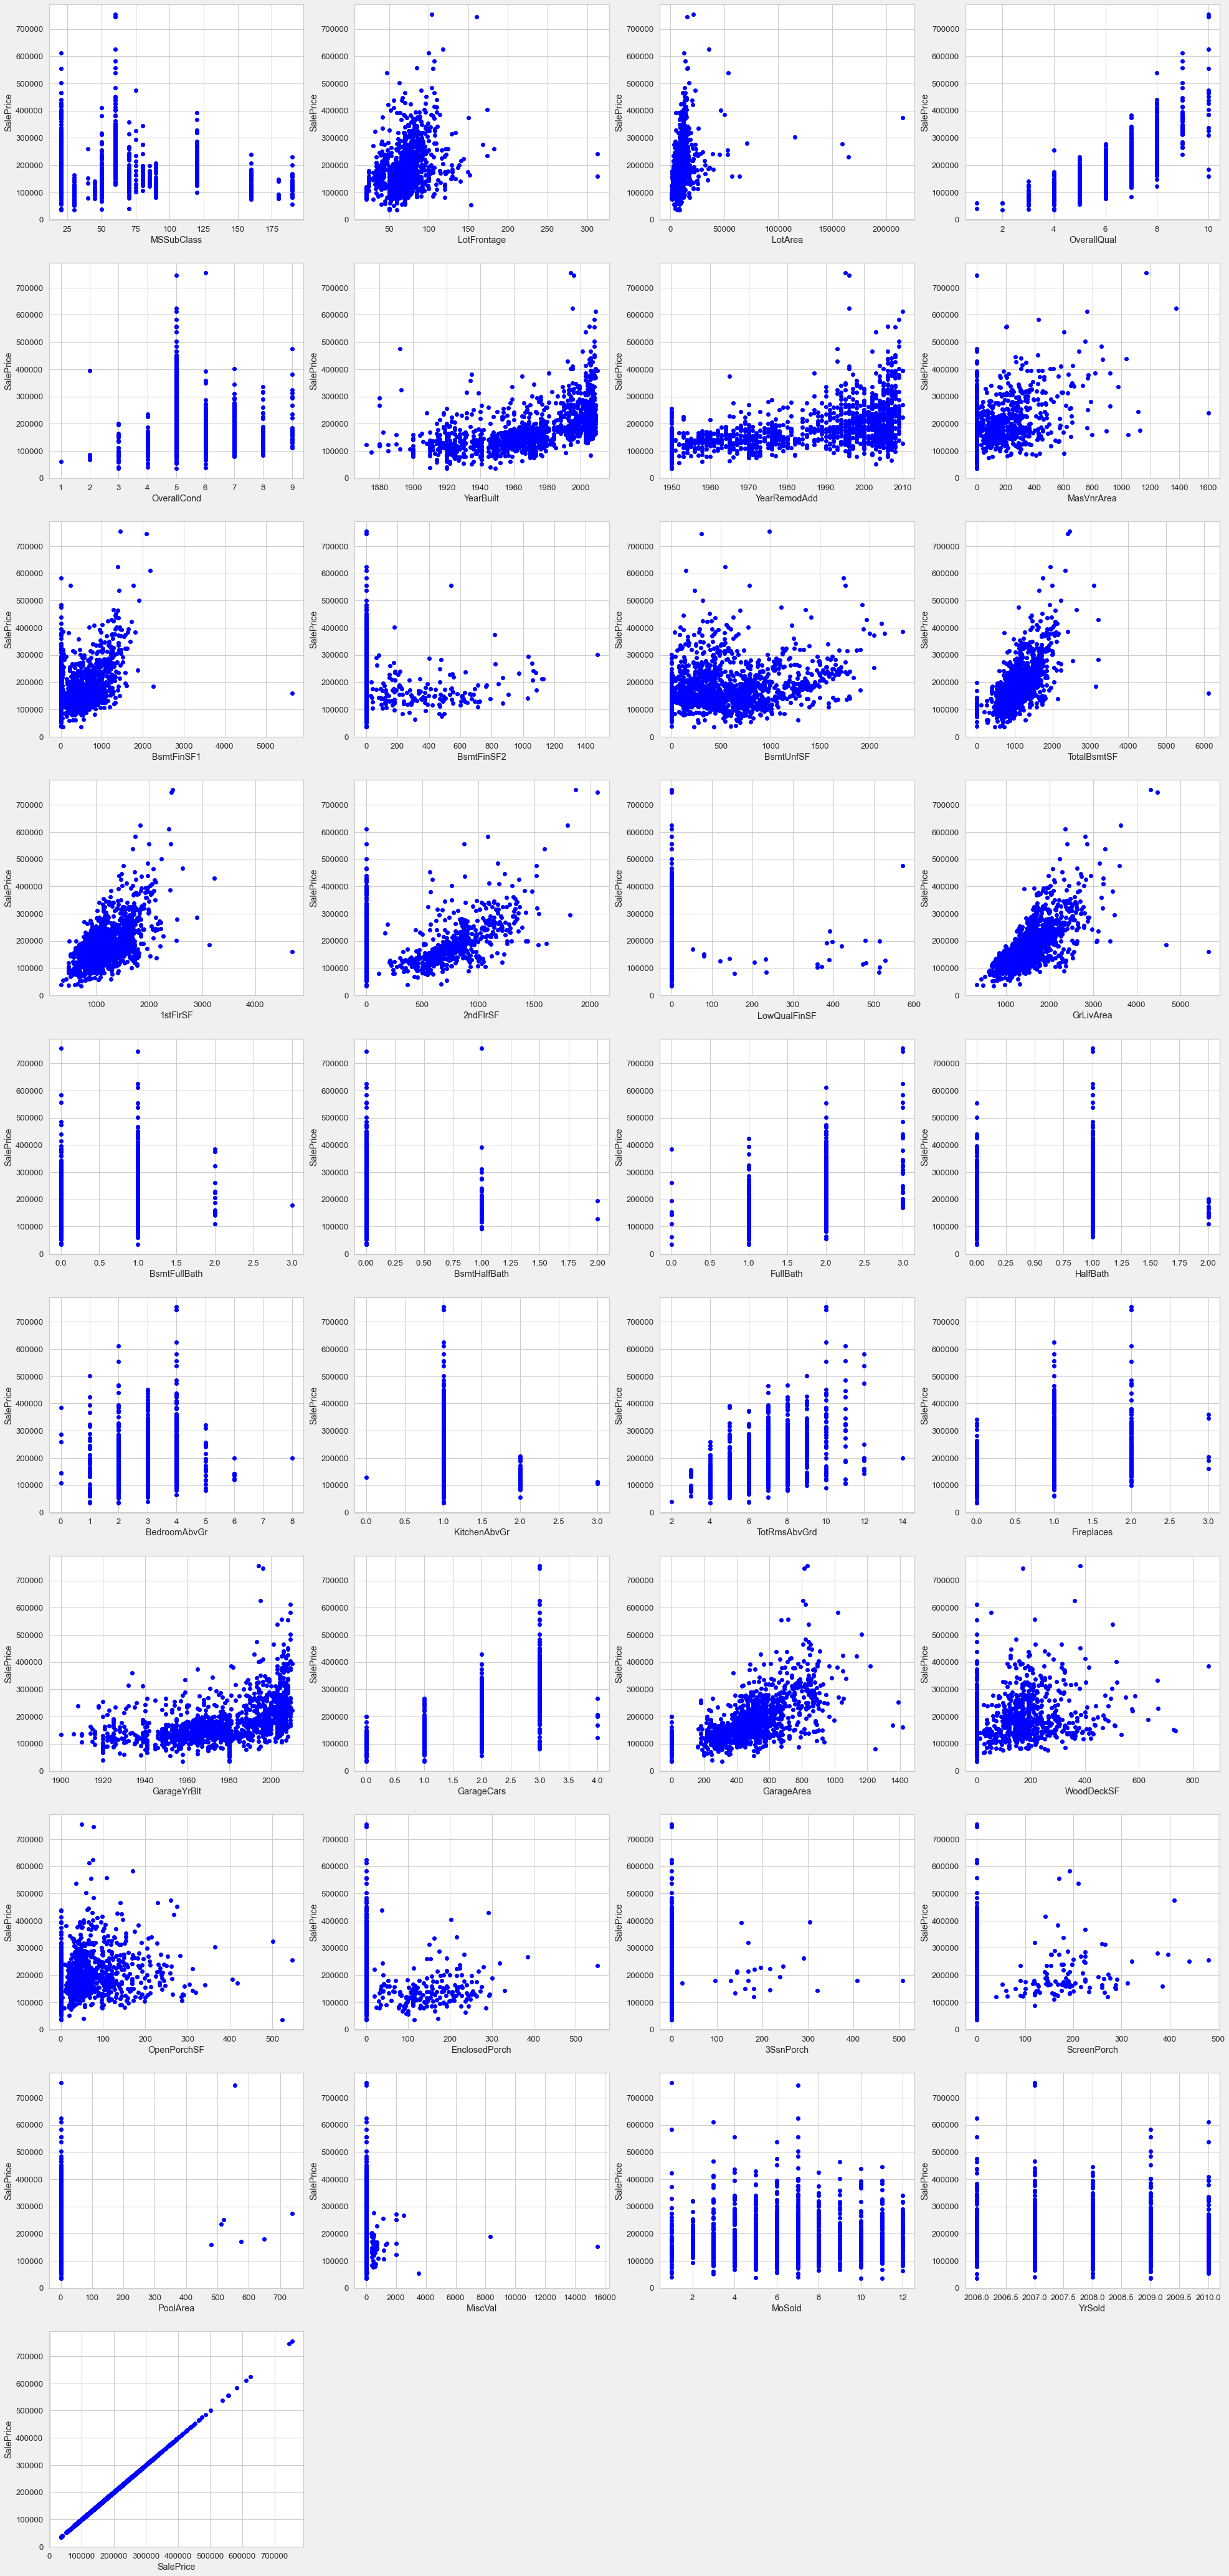

In [137]:
plt.figure(figsize = (30, 70))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

for i, feature in enumerate(num):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=train.iloc[:len(train)], x = feature, y = 'SalePrice', color = 'blue')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

In [138]:
train.LotFrontage[train.LotFrontage >= 160] = 160
train.LotArea[(train.LotArea >= 75000)] = 75000
train.MasVnrArea[(train.MasVnrArea >= 1000)] = 1000
train.BsmtFinSF1[(train.BsmtFinSF1 >= 2500)] = 2500
train.TotalBsmtSF[(train.TotalBsmtSF >= 3000)] = 3000
train['1stFlrSF'][(train['1stFlrSF'] >= 3000)] = 3000
train.GrLivArea[(train.GrLivArea >= 3500)] = 3500
train.GarageArea[(train.GarageArea >= 1500)] = 1500

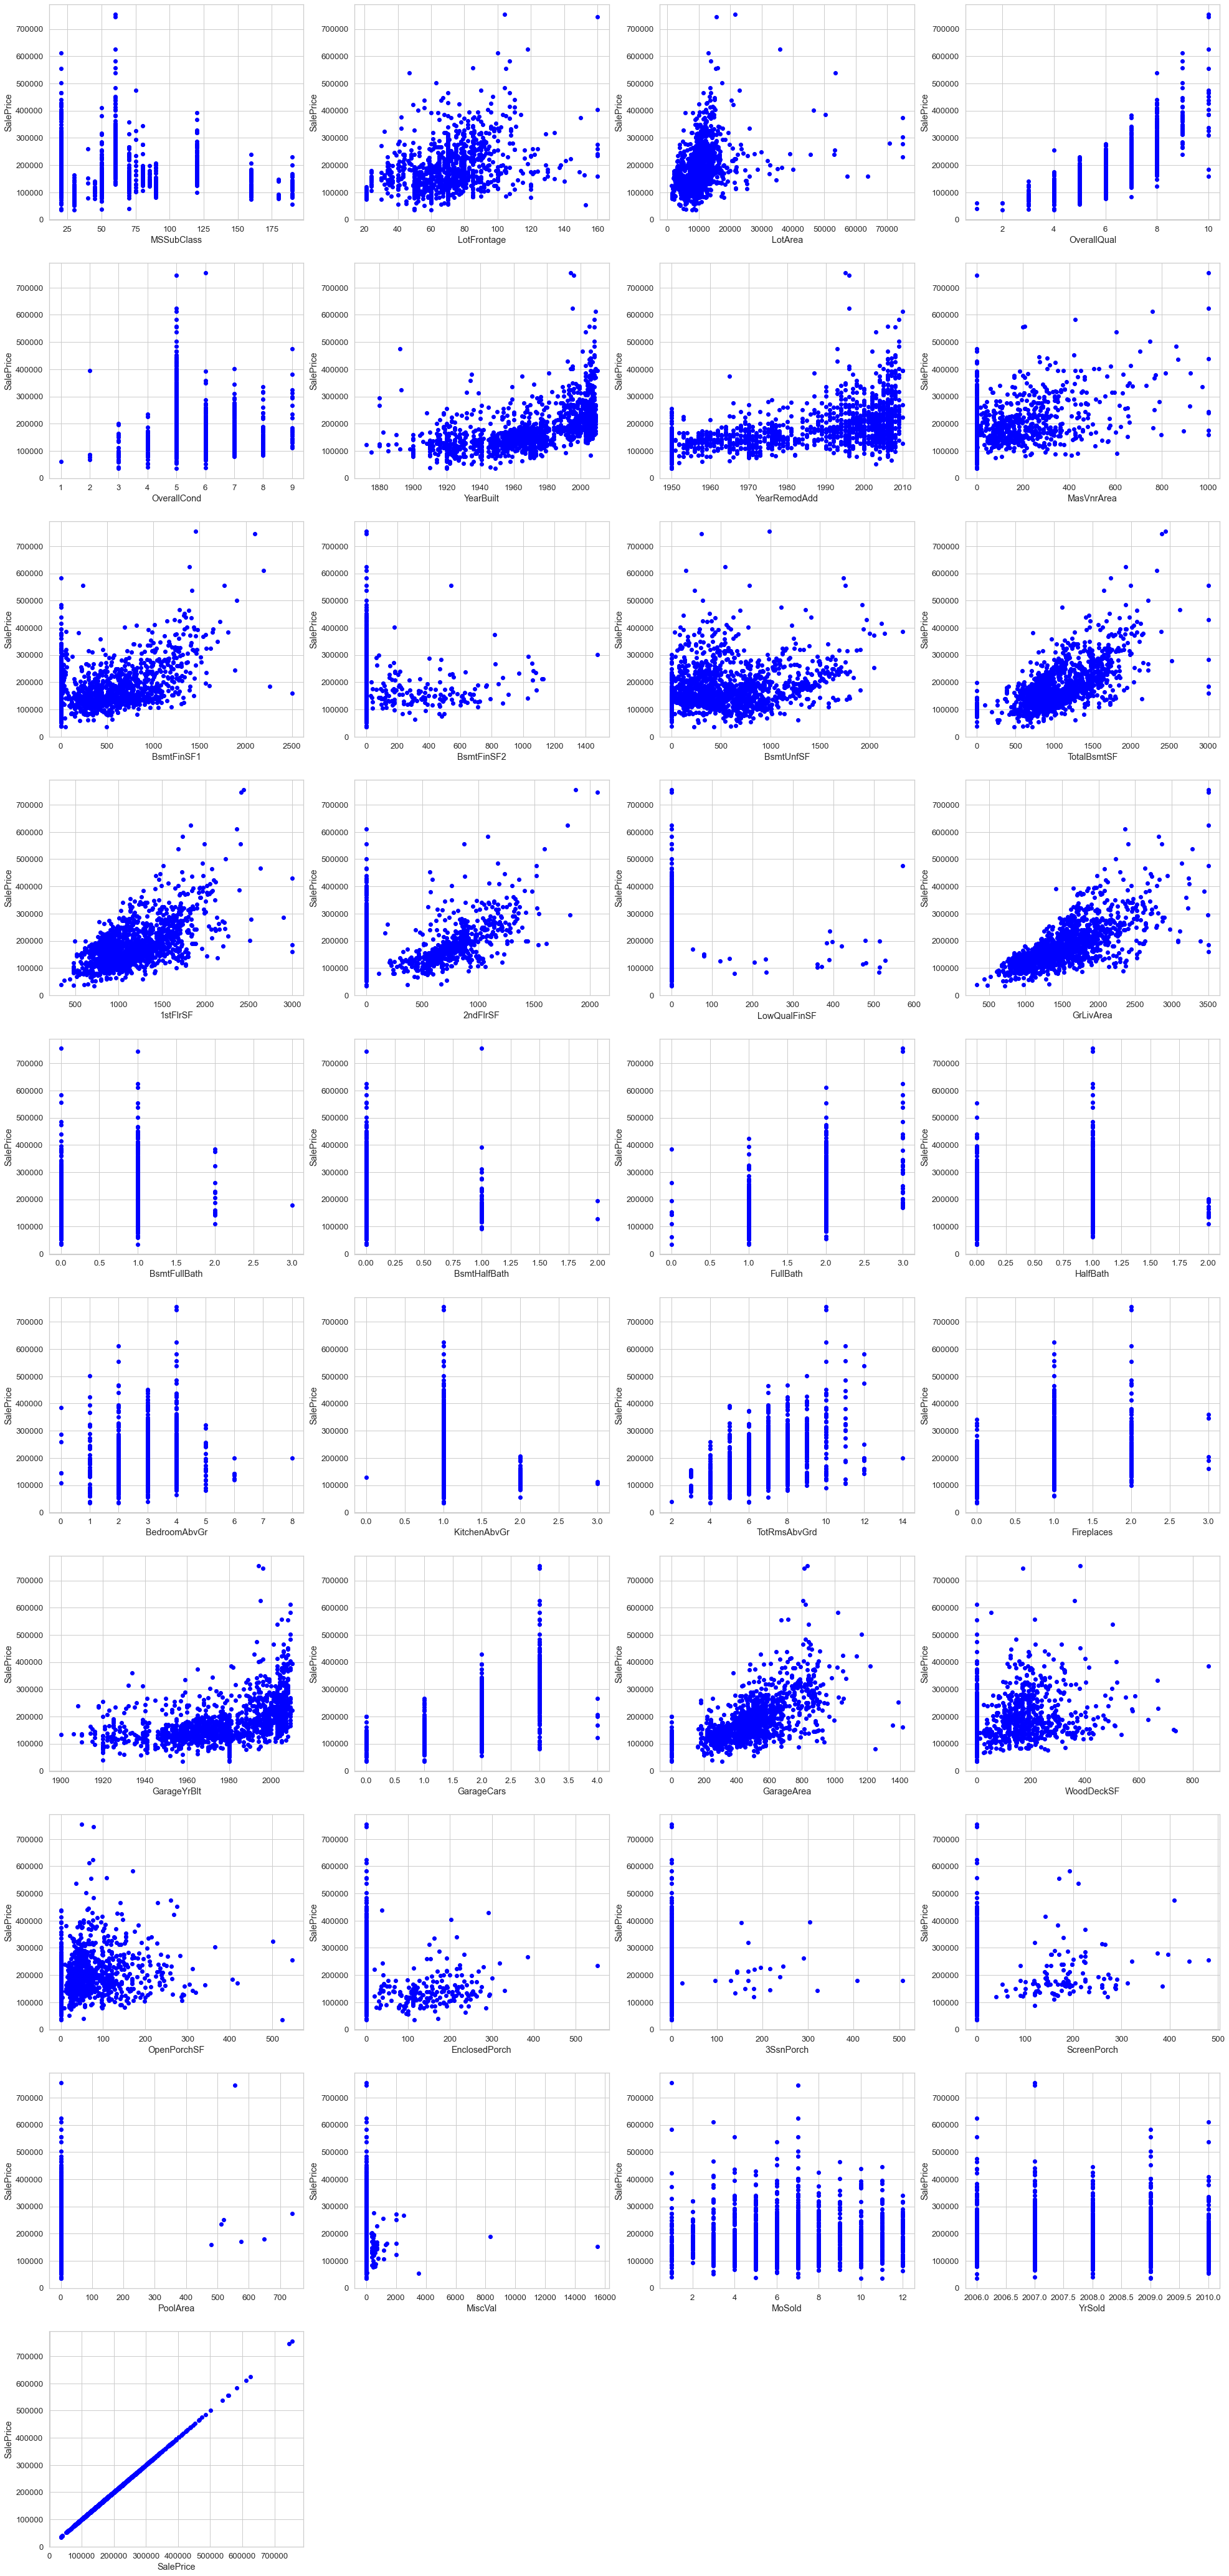

In [139]:
plt.figure(figsize = (30, 70))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')

for i, feature in enumerate(num):
    plt.subplot(10, 4, i+1)
    plt.scatter(data=train.iloc[:len(train)], x = feature, y = 'SalePrice', color = 'blue')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

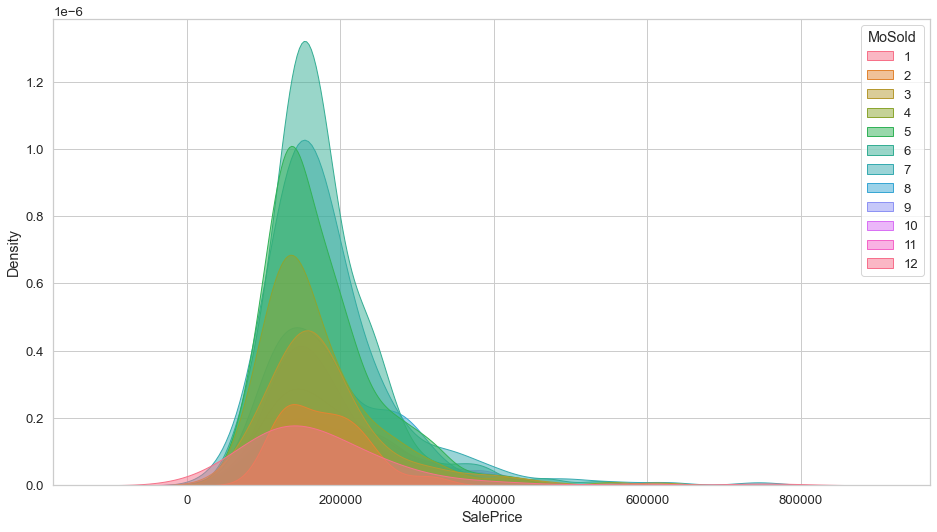

In [140]:
plt.figure(figsize=(14,8))
sns.kdeplot(data=train, x='SalePrice', hue='MoSold', fill=True, palette='husl', alpha = 0.5, linewidth=1)
plt.show()

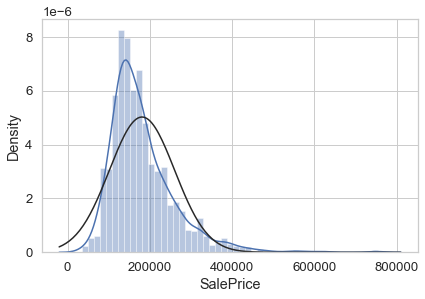

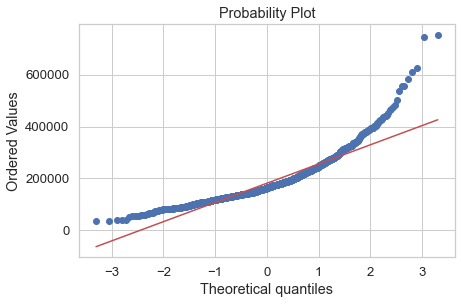

In [141]:
sns.distplot(train['SalePrice'], fit=norm)
plt.show()
stats.probplot(train['SalePrice'], plot = plt)
plt.show()

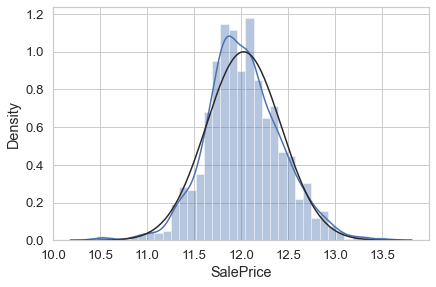

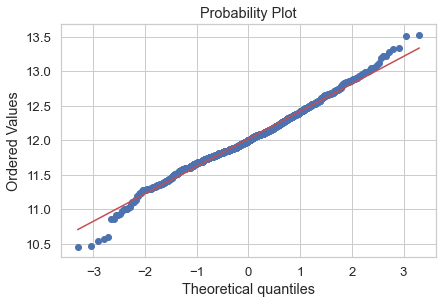

In [142]:
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'], fit=norm)
plt.show()

stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [143]:
train[cat].describe(include=np.object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,1151,1454,1369,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [144]:
#label encoding
le = LabelEncoder()
var_mode = train.select_dtypes(include='object').columns

for i in var_mode:
    train[i] = le.fit_transform(train[i])

for i in var_mode:
    test[i] = le.fit_transform(test[i])

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [146]:
#feature adding after transforming the data
# Adding total sqfootage feature to train data
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# Adding total sqfootage feature to test data
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [149]:
X = train.drop('SalePrice', axis = 1)
Y = train['SalePrice']

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,  y_test = train_test_split(X, Y, random_state = 101, test_size = 0.2)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [162]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [164]:
##printing variance score - between xtest and ytest - 1 means perfect
variance_score = lin_reg.score(x_test, y_test)
variance_score

0.8180121025730238

In [171]:
y_pred_lin_reg = lin_reg.predict(x_test)

In [189]:
rmse = '%.2f'%mean_squared_error(y_test, y_pred_lin_reg)
print(rmse)

0.03


In [199]:
##using cross-validation

cv = KFold(shuffle=True, random_state = 2, n_splits = 10)
scores = cross_val_score(lin_reg, X, Y, cv = cv, scoring='neg_mean_absolute_error')
print('%.8f'%scores.mean())

-0.09284663
